<a href="https://colab.research.google.com/github/robertZZZZZZZZ/pytorch/blob/main/01_pytorch_workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
from torch import nn
import matplotlib.pyplot as plt
import numpy as np

### Data prep and loading

In [2]:
weight = 0.7
bias = 0.3

start = 0
end = 1 
step = 0.02
X = torch.arange(start, end, step).unsqueeze(1)
y = weight*X + bias
y[:10], y.shape

(tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]),
 torch.Size([50, 1]))

In [3]:
train_split = int(0.8*len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

In [4]:
X_test.shape, X_train.shape, y_test.shape, y_train

(torch.Size([10, 1]),
 torch.Size([40, 1]),
 torch.Size([10, 1]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260],
         [0.4400],
         [0.4540],
         [0.4680],
         [0.4820],
         [0.4960],
         [0.5100],
         [0.5240],
         [0.5380],
         [0.5520],
         [0.5660],
         [0.5800],
         [0.5940],
         [0.6080],
         [0.6220],
         [0.6360],
         [0.6500],
         [0.6640],
         [0.6780],
         [0.6920],
         [0.7060],
         [0.7200],
         [0.7340],
         [0.7480],
         [0.7620],
         [0.7760],
         [0.7900],
         [0.8040],
         [0.8180],
         [0.8320],
         [0.8460]]))

In [29]:
def plot_predicitions(train_data=X_train,
                      train_labels=y_train,
                      test_data=X_test,
                      test_labels=y_test,
                      predictions=y_preds):

        plt.figure(figsize=(10, 7), layout='constrained')
        plt.scatter(train_data, train_labels, c="b", s=4, label= "training")
        plt.scatter(test_data, test_labels, c="g", s=4, label= "test")

        if predictions is not None:
          plt.scatter(test_data, predictions, c="r", s=4, label= "pred")

        plt.xlabel('x')
        plt.ylabel('y')
        plt.title("linear regression")
        plt.legend()

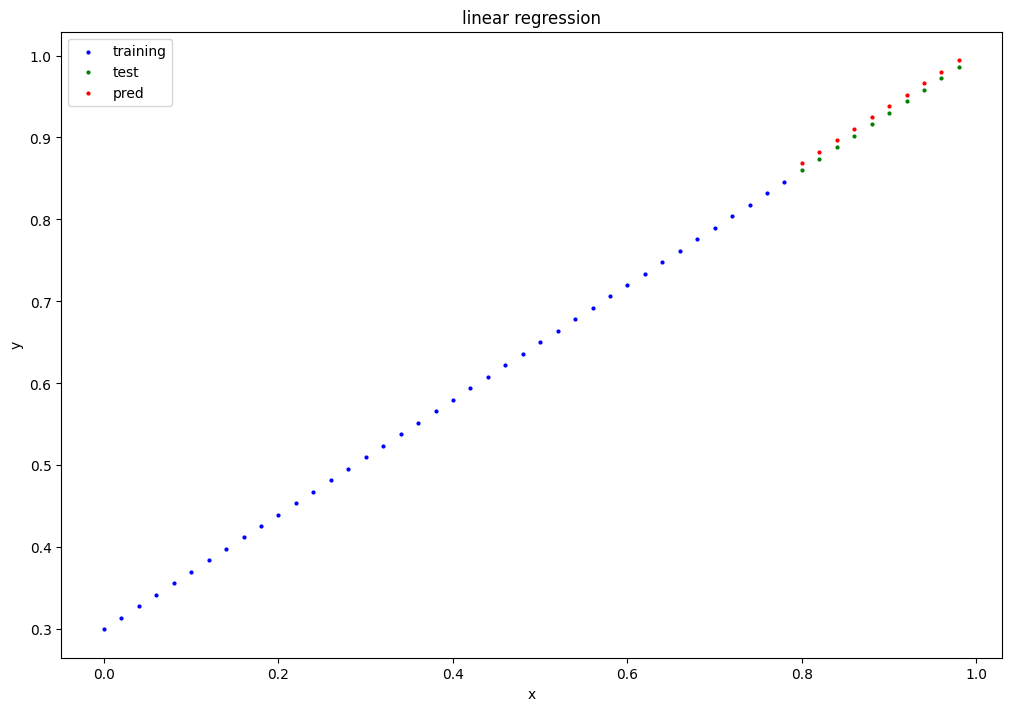

In [30]:
plot_predicitions()

In [23]:
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.weight = nn.Parameter(torch.randn(1,
                                            requires_grad=True,
                                            dtype=torch.float))
    self.bias = nn.Parameter(torch.randn(1,
                                         requires_grad=True,
                                         dtype=torch.float))
  def forward(self, x:torch.Tensor) -> torch.Tensor:
      return self.weight * x + self.bias
    
   

### Pytorch model building essentials

* torch.nn
* torch.nn.Parameters
* torch.nn.Module
* torch.optim
* def forward() - All nn.Module subclasses require to overwrite this methode
* torch.utils.data.Dataset
* torch.utils.data.Dataloader

In [24]:
torch.manual_seed(42)
model_0 = LinearRegressionModel()
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [10]:
model_0.state_dict()

OrderedDict([('weight', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [11]:
X_test, y_test

(tensor([[0.8000],
         [0.8200],
         [0.8400],
         [0.8600],
         [0.8800],
         [0.9000],
         [0.9200],
         [0.9400],
         [0.9600],
         [0.9800]]),
 tensor([[0.8600],
         [0.8740],
         [0.8880],
         [0.9020],
         [0.9160],
         [0.9300],
         [0.9440],
         [0.9580],
         [0.9720],
         [0.9860]]))

### Making pred using `torch.inference_mode()`

In [28]:
with torch.inference_mode():
  y_preds = model_0(X_test)

y_preds

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

## Training

In [26]:
# Loss function
loss_fn = nn.L1Loss()

# Optimizer

optimizer = torch.optim.SGD(params= model_0.parameters(),
                            lr = 0.01,
                            )

In [27]:
epochs = 200

# Tracking
epoch_count = []
loss_values = []
test_loss_values = []

for epoch in range(epochs):
  
  ### training

  model_0.train() # train mode

  y_pred = model_0(X_train) # 1. Forward pass

  loss = loss_fn(y_pred, y_train) # 2. Calculate loss
  #print(f"Loss:{loss}")

  optimizer.zero_grad() # 3. Optimizer zero out gradients

  loss.backward() # 4. Perform backpropagation

  optimizer.step() # 5. Perform gradient descent

  ### testing
  model_0.eval()  

  with torch.inference_mode():
    y_preds = model_0(X_test)
    test_loss = loss_fn(y_preds, y_test)
  
  if epoch % 10 ==0:
    epoch_count.append(epoch)
    loss_values.append(loss)
    test_loss_values.append(test_loss)
    print(f"Epoch: {epoch}| Loss: {loss} | Test loss:{test_loss}")

Epoch: 0| Loss: 0.31288138031959534 | Test loss:0.48106518387794495
Epoch: 10| Loss: 0.1976713240146637 | Test loss:0.3463551998138428
Epoch: 20| Loss: 0.08908725529909134 | Test loss:0.21729660034179688
Epoch: 30| Loss: 0.053148526698350906 | Test loss:0.14464017748832703
Epoch: 40| Loss: 0.04543796554207802 | Test loss:0.11360953003168106
Epoch: 50| Loss: 0.04167863354086876 | Test loss:0.09919948130846024
Epoch: 60| Loss: 0.03818932920694351 | Test loss:0.08886633068323135
Epoch: 70| Loss: 0.03476089984178543 | Test loss:0.0805937647819519
Epoch: 80| Loss: 0.03132382780313492 | Test loss:0.07232122868299484
Epoch: 90| Loss: 0.02788739837706089 | Test loss:0.06473556160926819
Epoch: 100| Loss: 0.024458957836031914 | Test loss:0.05646304413676262
Epoch: 110| Loss: 0.021020207554101944 | Test loss:0.04819049686193466
Epoch: 120| Loss: 0.01758546568453312 | Test loss:0.04060482233762741
Epoch: 130| Loss: 0.014155393466353416 | Test loss:0.03233227878808975
Epoch: 140| Loss: 0.0107165891

### Testing

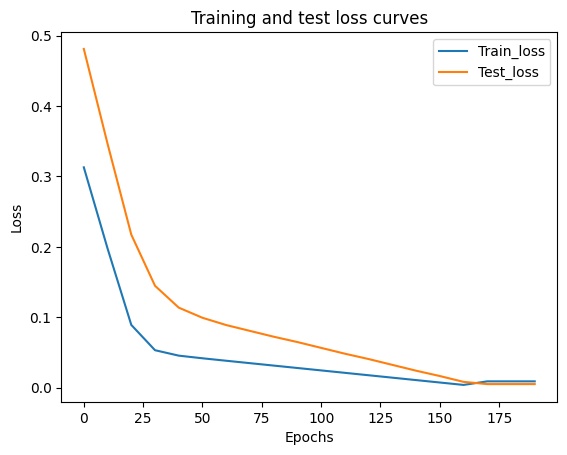

In [38]:

# Plot loss curves

plt.plot(epoch_count, torch.tensor(loss_values).detach().numpy(), label = "Train_loss")
plt.plot(epoch_count, test_loss_values, label = "Test_loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

### Saving a model
1. `torch.save()` - pickle format
2. `torch.load()`
3. `torch.nn.Module.load_state_dict()`

In [42]:
from pathlib import Path

# Create model path
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# Create model save path
MODEL_NAME = "01_pytorch_workflow_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# Save model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(),
           f=MODEL_SAVE_PATH)

Saving model to: models/01_pytorch_workflow_model_0.pth


In [45]:
!ls -l models

total 4
-rw-r--r-- 1 root root 1207 Apr  6 13:21 01_pytorch_workflow_model_0.pth


In [48]:
# Loading a pytorch model
loaded_model_0 = LinearRegressionModel()

loaded_model_0.load_state_dict(torch.load(MODEL_SAVE_PATH))

loaded_model_0.state_dict()

OrderedDict([('weight', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [52]:
loaded_model_0.eval()
with torch.inference_mode():
  loaded_model_preds = loaded_model_0(X_test)

loaded_model_preds==y_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

## Putting all together

In [16]:
import torch

# device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device:{device}")

Using device:cuda


In [17]:
# Create linear model by subclassing nn.Module

class LinearRegressionModelV2(torch.nn.Module):
  def __init__(self):
    super().__init__()
    self.linear_layer = torch.nn.Linear(in_features=1,
                                  out_features=1)
    
    def forward(self, x:torch.Tensor) -> torch.Tensor:
      return self.linear_layer(x)

In [18]:
torch.manual_seed(42)
model_1 = LinearRegressionModelV2()
model_1, model_1.state_dict()

(LinearRegressionModelV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [10]:
# Check model current device
next(model_1.parameters()).device

device(type='cpu')

In [11]:
model_1.to(device)
next(model_1.parameters()).device

device(type='cuda', index=0)